In [24]:
# Import dependencies
from IPython.display import Image, display, Markdown
%matplotlib inline
from matplotlib import style as style
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
from datetime import timedelta
from flask import Flask, jsonify

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
from sqlalchemy import Column, Integer, String, Float
from sqlalchemy.ext.declarative import declarative_base
from dateutil.relativedelta import relativedelta
from sqlalchemy import cast, Date


# Reflect Tables into SQLAlchemy ORM

In [4]:
# Create engine and connection
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
connection = engine.connect()

# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [5]:
# Inspect SQLite tables, get names
inspector = inspect(engine)
inspector.get_table_names()


['measurement', 'station']

In [6]:
display(Markdown("## Measurement Table Colums & Types"))

# Using the inspector to print the column names within the table and its types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])


## Measurement Table Colums & Types

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [7]:

display(Markdown("## Station Table Colums & Types"))

# Using the inspector to print the column names and types
columns = inspector.get_columns('station')

for column in columns:
    print(column["name"], column["type"])
    


## Station Table Colums & Types

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [78]:
# Create easy handles for tables
measurement = Base.classes.measurement
station = Base.classes.station

# Create a link to database (start session)
session = Session(engine)

# Test a few rows from each table - measurement
display(Markdown("## Measurement"))
for row in session.query(measurement.id, measurement.station, measurement.date,\
                         measurement.prcp,measurement.tobs).limit(5).all():
    print(row)
    
# Test station
display(Markdown("## Station"))
for row in session.query(station.id, station.name, station.longitude,\
                         station.latitude,station.elevation).limit(5).all():
    print(row)



## Measurement

(1, 'USC00519397', '2010-01-01', 0.08, 65.0)
(2, 'USC00519397', '2010-01-02', 0.0, 63.0)
(3, 'USC00519397', '2010-01-03', 0.0, 74.0)
(4, 'USC00519397', '2010-01-04', 0.0, 76.0)
(5, 'USC00519397', '2010-01-06', None, 73.0)


## Station

(1, 'WAIKIKI 717.2, HI US', -157.8168, 21.2716, 3.0)
(2, 'KANEOHE 838.1, HI US', -157.8015, 21.4234, 14.6)
(3, 'KUALOA RANCH HEADQUARTERS 886.9, HI US', -157.8374, 21.5213, 7.0)
(4, 'PEARL CITY, HI US', -157.9751, 21.3934, 11.9)
(5, 'UPPER WAHIAWA 874.3, HI US', -158.0111, 21.4992, 306.6)


In [79]:
display(Markdown("## Table output as dictonary"))

# Reflect the tables
Base.metadata.create_all(engine)
# Base.metadata.drop_all(engine)

 # Display the row's columns and data in dictionary format
first_row = session.query(measurement).first()
first_row.__dict__


## Table output as dictonary

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1ebb7b7ed00>,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08}

In [11]:
# Save reference to first each table 
# (Note: second table's query more detailed - will do this later)
measurements_df = pd.read_sql("SELECT * FROM measurement",connection)

# Exploratory Climate Analysis

In [31]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
latest_data = session.query(measurement.date).order_by(measurement.date.desc()).first()

#Last 12 months, query start
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

#Last 12 months, query start
start = query_date 

end = query_date + dt.timedelta(days=365)

In [34]:
display(Markdown(" # Weather Station Data - Latest 12 Months"))

last_year_df = session.query(measurement.date >= start)

#reflect an existing database into a new model
measurements_df = pd.read_sql( f"SELECT * FROM measurement \
                                WHERE date > {start}\
                                ORDER BY date" \
                               ,connection )


measurements_df.dropna(inplace=True)
measurements_df

 # Weather Station Data - Latest 12 Months

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2725,USC00513117,2010-01-01,0.28,67.0
2,9008,USC00518838,2010-01-01,0.21,72.0
3,9519,USC00519523,2010-01-01,0.15,75.0
4,12188,USC00519281,2010-01-01,0.15,70.0
...,...,...,...,...,...
19545,19549,USC00516128,2017-08-22,0.50,76.0
19546,2724,USC00519397,2017-08-23,0.00,81.0
19547,7635,USC00514830,2017-08-23,0.00,82.0
19548,12187,USC00519523,2017-08-23,0.08,82.0


In [80]:
# Store precip data as dataframe
precip_df = pd.DataFrame({ 
                            "Date": measurements_df["date"],
                            "Precip": measurements_df["prcp"]})

display(Markdown("## Daily Precipitation"))

# Output daily average
precip_df.groupby(precip_df["Date"]).mean()

## Daily Precipitation

,Precip
Date,
2010-01-01,0.151429
2010-01-02,0.002857
2010-01-03,0.000000
2010-01-04,0.001429
2010-01-05,0.005000
...,...
2017-08-19,0.030000
2017-08-20,0.005000
2017-08-21,0.193333


 # Bar Chart: Temperature Observations

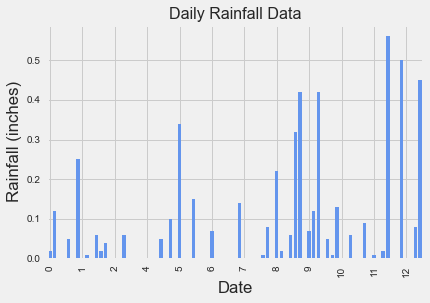

In [35]:
display(Markdown(" # Bar Chart: Temperature Observations"))
#fig = plt.figure();

# Configure chart with title and labelled axis

def bar_chart(y, title, xlabel, ylabel):
    style.use('fivethirtyeight')
    y.plot(kind='bar', color= 'cornflowerblue', width=.75);
    plt.title(title,fontsize =16)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(0, len(y), step=7))

    return plt.show()

bar_chart(precip_df["Precip"],"Daily Rainfall Data","Date","Rainfall (inches)")


In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()


,Precip
count,81.000000
mean,0.063951
std,0.126023
min,0.000000
25%,0.000000
50%,0.000000
75%,0.060000
max,0.560000


In [36]:
# Design a query to show how many stations are available in this dataset?
stations_df = pd.read_sql( f"SELECT COUNT(station) \
                             AS 'No. Obs'\
                            ,station AS 'Station' \
                             FROM measurement \
                             WHERE date > {start}\
                             GROUP BY station \
                             ORDER BY COUNT(station) DESC"\
                            ,connection )


In [81]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

display(Markdown("## Count of Obs by Station"))
stations_df

## Count of Obs by Station

,No. Obs,Station
0,2772,USC00519281
1,2724,USC00519397
2,2709,USC00513117
3,2669,USC00519523
4,2612,USC00516128
5,2202,USC00514830
6,1979,USC00511918
7,1372,USC00517948
8,511,USC00518838


In [72]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
station_ID = pd.read_sql( f"SELECT COUNT(station) AS 'Tot. Obs' \
                            ,station AS 'Station' \
                             FROM measurement \
                             WHERE date > {query_date}\
                             GROUP BY station \
                             ORDER BY COUNT(station) DESC \
                             LIMIT 1"\
                            ,connection )

display(Markdown("### Most Observations"))
station_ID


### Most Observations

,Tot. Obs,Station
0,2772,USC00519281


In [82]:
most_obs = station_ID.at[0,"Station"]

station_low = pd.read_sql( f"SELECT \
                             tobs AS 'Min Temp'\
                             FROM measurement \
                             WHERE date > {start}\
                             AND station = '{most_obs}'\
                             ORDER BY (tobs) ASC \
                             LIMIT 1"\
                            ,connection )


display(Markdown("## Lowest Temperature"))
# station_low = session.query(measurement.tobs).order_by(measurement.date.desc()).first()
station_low


## Lowest Temperature

,Min Temp
0,54.0


In [83]:
station_high = pd.read_sql( f"SELECT \
                             tobs AS 'Max Temp' \
                             FROM measurement \
                             WHERE date > {query_date}\
                             AND station = '{most_obs}'\
                             ORDER BY (tobs) DESC \
                             LIMIT 1"\
                            ,connection )

display(Markdown("## Highest Temperature"))
station_high


## Highest Temperature

,Max Temp
0,85.0


In [84]:
station_average = pd.read_sql( f"SELECT (SUM(tobs)/COUNT(tobs))\
                             AS Average \
                             FROM measurement \
                             WHERE date > {query_date}\
                             AND station = '{most_obs}'\
                             LIMIT 1"\
                            ,connection )

display(Markdown("## Station Average"))
station_average

## Station Average

,Average
0,71.663781


In [85]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature obsertvation data for this station and plot the results as a histogram

# Checking stations
station_tobs_df = pd.read_sql( f"SELECT COUNT(tobs) \
                             AS 'Temp Obs'\
                            ,station AS 'Station' \
                             FROM measurement \
                             WHERE date > {query_date}\
                             GROUP BY station \
                             ORDER BY COUNT(tobs) DESC"\
                            ,connection )

display(Markdown(f"## Last 12 Months' Observations for {most_obs} "))
station_tobs_df


## Last 12 Months' Observations for USC00519281 

,Temp Obs,Station
0,2772,USC00519281
1,2724,USC00519397
2,2709,USC00513117
3,2669,USC00519523
4,2612,USC00516128
5,2202,USC00514830
6,1979,USC00511918
7,1372,USC00517948
8,511,USC00518838


 # Frequency of Temperature Observations

Text(0, 0.5, 'No. Observations')

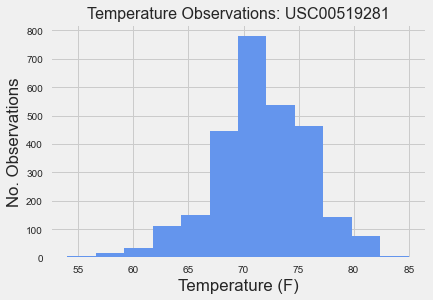

In [75]:
# Saving results to dataframe
station_tobs_df = pd.read_sql( f"SELECT tobs \
                             AS 'Temp Obs'\
                            ,station AS 'Station' \
                             FROM measurement \
                             WHERE date > {query_date} AND station = '{most_obs}'"\
                            ,connection )

#Plotting results
display(Markdown(" # Frequency of Temperature Observations"))
style.use('fivethirtyeight')
station_tobs_df["Temp Obs"].hist(histtype='bar', bins = 12, color = 'cornflowerblue')
plt.title(f"Temperature Observations: {most_obs}",fontsize =16)
plt.xlabel("Temperature (F)")
plt.ylabel("No. Observations")

## Bonus Challenge Assignment

In [77]:
# Too busy to try bonus section this week :(
